In [14]:
# import numpy as np
import os
import cv2
import numpy as np
import glob
from PIL import Image
import zipfile
%tensorflow_version 2.x
from PIL import Image
import tensorflow as tf

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
reshapedpatches_training = []
reshapedpatches_training = np.load('D:\\google drive\\Missions\\mission Retina\\Do some code\\model\\7 by 7 skip 2\\reshaped patches 7 by 7 skip 2\\patches7n7nskip2.npy')

In [4]:
reshapedpatches_training.shape

(1652720, 7, 7, 3)

# Get ouput array 

In [5]:
def getoutputarr(images,skip):
    outputarr=[]
    for k in range(images.shape[0]):
        for i in range(0,images.shape[1],skip):
            for j in range(0,images.shape[2],skip):
                outputarr.append(images[k,i,j])
    return(np.array(outputarr))

In [7]:
images=[]
for i in range(21,41):
    a=np.array(Image.open("D:\\google drive\\Missions\\mission Retina\\dataset\\navdeep sir datasets\\DRIVE\\training\\1st_manual\\{}_manual1.gif".format(i)))
    images.append(a)
outputs=getoutputarr(np.array(images),2)

In [10]:
y=outputs
w=y//255
z=set(w)
y=w
y.shape

(1652720,)

In [26]:
X = reshapedpatches_training
# Y = out[uts]

X_train,X_val,y_train,y_val=X[0:1500000,:,:],X[1500000:1652721,:,:],y[0:1500000],y[1500000:1652721]

In [29]:
y_val.shape

(152720,)

In [24]:
y.shape

(1652720,)

In [8]:
outputs.shape

(1652720,)

In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(7, 7, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(9, 9, 3)),
    # tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

In [31]:
history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val,y_val))

Train on 1500000 samples, validate on 152720 samples
Epoch 1/10
1500000/1500000 [==============================] - 281s 187us/sample - loss: 0.1334 - acc: 0.9525 - val_loss: 0.1256 - val_acc: 0.9532
Epoch 2/10
1500000/1500000 [==============================] - 290s 193us/sample - loss: 0.1288 - acc: 0.9541 - val_loss: 0.1143 - val_acc: 0.9572
Epoch 3/10
1500000/1500000 [==============================] - 328s 219us/sample - loss: 0.1266 - acc: 0.9548 - val_loss: 0.1171 - val_acc: 0.9553
Epoch 4/10
1500000/1500000 [==============================] - 349s 232us/sample - loss: 0.1251 - acc: 0.9555 - val_loss: 0.1162 - val_acc: 0.9566
Epoch 5/10
1500000/1500000 [==============================] - 307s 205us/sample - loss: 0.1252 - acc: 0.9556 - val_loss: 0.1136 - val_acc: 0.9573
Epoch 6/10
1500000/1500000 [==============================] - 290s 193us/sample - loss: 0.1242 - acc: 0.9557 - val_loss: 0.1165 - val_acc: 0.9570
Epoch 7/10
1500000/1500000 [==============================] - 296s 197u

In [32]:
model.save('D:\\google drive\\Missions\\mission Retina\\Do some code\\model\\7 by 7 skip 2\\trained model\\model1st7by7.hdf5')

In [38]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [36]:
tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


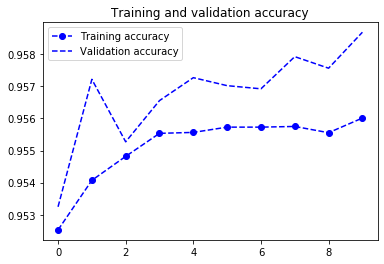

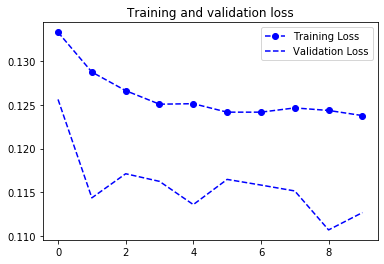

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.savefig('training acc graph 7 by 7.jpg')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.savefig('training loss graph 7 by 7.jpg')

plt.legend()

plt.show()
